La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'il faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`capa_num` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

# Exemple d'implémentation

## Implémentation

On présente des exemples d'implémentation des différentes dérivations.

### Dérivation numérique

In [1]:
from numpy import *
from matplotlib.pyplot import *

def d_g(f, x0, pas):
  """Dérivation à gauche"""
  return (f(x0) - f(x0 - pas)) / pas

def d_d(f, x0, pas):
  """Dérivation à gauche"""
  return (f(x0 + pas) - f(x0)) / pas

def d_c(f, x0, pas):
  """Dérivation à gauche"""
  return (f(x0 + pas) - f(x0 - pas)) / (2 * pas)

def d_discrete(xk, yk):
  """Dérivée discrète"""
  n = len(xk)
  dy = [(yk[1] - yk[0])/ (xk[1] - xk[0])]  # Premier terme - Dérivée à gauche
  for k in range(1, n - 1): # Pas le premier ni le dernier cas
    dy.append((yk[k+1] - yk[k-1])/ (xk[k+1] - xk[k-1]))  # Dérivée au centre
  dy.append((yk[n-1] - yk[n-2])/ (xk[n-1] - xk[n-2]))  # Dérivée à droite
  return array(dy) # transformation en vecteur numpy

### Intégration numérique

In [2]:
from numpy import *
from matplotlib.pyplot import *

def i_g(f, x0, xf, N):
  """Intégration par rectangle à gauche"""
  I = 0
  pas = (xf - x0) / N
  for k in range(1,N+1): # On commence à 1 pour placer les rectangles à gauche
    I += f(x0 + k * pas) * pas
  return I

def i_d(f, x0, xf, N):
  """Intégration par rectangle à droite"""
  I = 0
  pas = (xf - x0) / N
  for k in range(0,N): # On commence à 0 pour placer les rectangles à droite
    I += f(x0 + k * pas) * pas
  return I

def i_c(f, x0, xf, N):
  """Intégration par rectangle au centre"""
  I = 0
  pas = (xf - x0) / N
  for k in range(0,N):
    I += f(x0 + (k + 1/2) * pas) * pas  # Décalage de 1/2 pour centrer les rectangles
  return I

def i_t(f, x0, xf, N):
  """Intégration par trapèzes"""
  I = 0
  pas = (xf - x0) / N
  for k in range(0,N):
    I += (f(x0 + k * pas) + f(x0 + (k+1) * pas)) / 2 * pas  # Aire d'un trapèze

def i_discrete(xk, yk):
  """Integration discrète"""
  n = len(xk)
  I = [0]  # Premier terme nul - intégrales toute à partir de x0
  for k in range(1, n): # Pas le premier terme
    I.append(I[-1] + (yk[k] + yk[k-1]) / 2 * (xk[k] - xk[k-1]))  # Trapèze - Suite de valeurs
  return array(I) #

# Implémentation

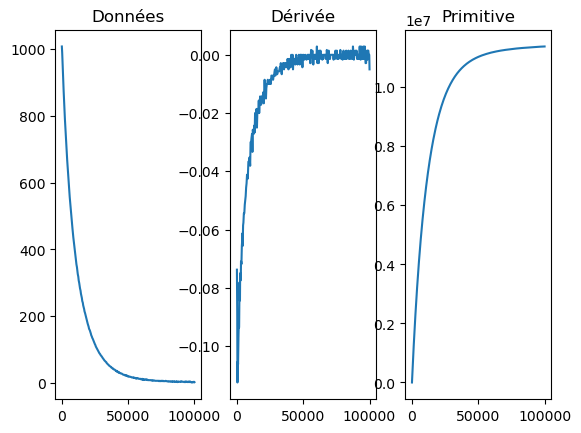

In [3]:
from urllib.request import urlopen # Pas à connaître
url = "https://github.com/pcsi3physiquestan/donnees_exp/blob/main/circuit_rc.dat?raw=true"
webpage = urlopen(url)


datas = loadtxt(webpage, skiprows = 7, delimiter=";")
deriva = d_discrete(datas[:, 0], datas[:, 1])
integr = i_discrete(datas[:, 0], datas[:, 1])
f, ax = subplots(1, 3)
ax[0].set_title("Données")
ax[0].plot(datas[:, 0], datas[:, 1])
ax[1].set_title("Dérivée")
ax[1].plot(datas[:, 0], deriva)
ax[2].set_title("Primitive")
ax[2].plot(datas[:, 0], integr)

_On remarquera que les calculs de dérivées numériques tendent à faire apparaître des "parasites". Il est conseillé de lisser d'abord la courbe avant de la dérivée._